# DM Statistiques

In [1]:
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import scale
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
import numpy as np
from sklearn.utils import resample
from random import sample

%matplotlib inline  

## Exercice 1

#### Q1

$$y=X\theta + \epsilon$$

avec $y\in\mathbb{R}^{n}$ le vecteur des observations, $X\in\mathbb{R}^{n\times p}$ la matrices des variables explicatives, $\theta\in\mathbb{R}^{p}$ le vecteur des paramètres du modèle ($\theta_{0}$ l'ordonnée à l'origine et $\theta_{0<i \le p }$ les coefficients directeurs), $\epsilon\in\mathbb{R}^{n}$ le bruit supposé gaussien, de moyenne nulle et de même distribution sur chaque observation $y_{i}$.

#### Q2

In [2]:
# Problemes avec statsmodel dans Pytohn3.4 donc :

df = pd.read_csv('https://dl.dropboxusercontent.com/u/6044937/Data%20Sets/airquality.csv',
                 index_col=0, error_bad_lines=True)

print(df.head(10))

    Ozone  Solar.R  Wind  Temp  Month  Day
1      41      190   7.4    67      5    1
2      36      118   8.0    72      5    2
3      12      149  12.6    74      5    3
4      18      313  11.5    62      5    4
5     NaN      NaN  14.3    56      5    5
6      28      NaN  14.9    66      5    6
7      23      299   8.6    65      5    7
8      19       99  13.8    59      5    8
9       8       19  20.1    61      5    9
10    NaN      194   8.6    69      5   10


#### Q3

In [3]:
df = df.dropna()
print(df.head(10))

    Ozone  Solar.R  Wind  Temp  Month  Day
1      41      190   7.4    67      5    1
2      36      118   8.0    72      5    2
3      12      149  12.6    74      5    3
4      18      313  11.5    62      5    4
7      23      299   8.6    65      5    7
8      19       99  13.8    59      5    8
9       8       19  20.1    61      5    9
12     16      256   9.7    69      5   12
13     11      290   9.2    66      5   13
14     14      274  10.9    68      5   14


#### Q4

    Ozone   Solar.R      Wind      Temp     Month       Day
1      41  0.057028 -0.713840 -1.132511 -1.504117 -1.716505
2      36 -0.732859 -0.545193 -0.607850 -1.504117 -1.601658
3      12 -0.392769  0.747773 -0.397986 -1.504117 -1.486810
4      18  1.406418  0.438585 -1.657171 -1.504117 -1.371963
7      23  1.252828 -0.376545 -1.342375 -1.504117 -1.027420
8      19 -0.941302  1.085068 -1.971968 -1.504117 -0.912572
9       8 -1.818954  2.855868 -1.762104 -1.504117 -0.797725
12     16  0.781091 -0.067358 -0.922647 -1.504117 -0.453182
13     11  1.154093 -0.207897 -1.237443 -1.504117 -0.338335
14     14  0.978562  0.269938 -1.027579 -1.504117 -0.223487


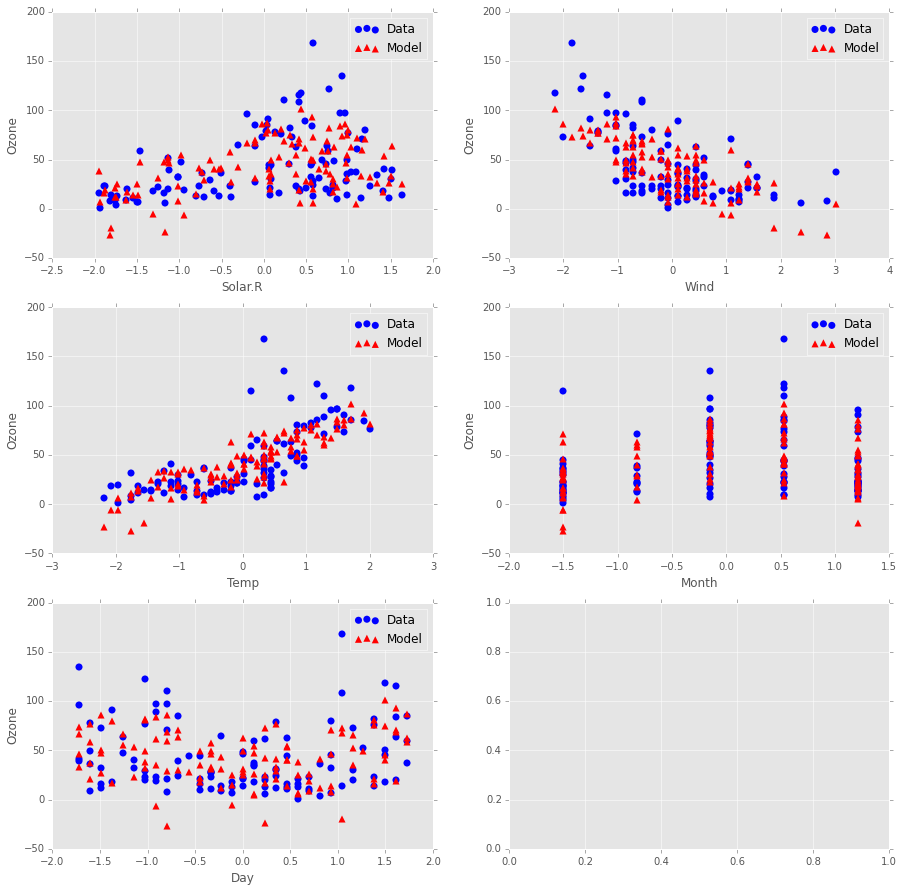

In [4]:
# rescaling of the features
cols = df.columns.tolist()

features_cols = cols.copy()    # list of the names of the features columns
features_cols.remove('Ozone')

norms = {}
for col in features_cols:
    # keeping the normalization coeff:
    norms[col] = [df[col].mean(), df[col].var()]
    # normalizing the data set
    df[col] = (df[col] - norms[col][0]) / (norms[col][1])**0.5

print(df.head(10))


def build_linearModel(df, features_cols, interest_col):
    """build a linear model on the dataFrame df"""

    # temporary arrays x and y
    xTemp = df[features_cols].values
    yTemp = df[interest_col].values

    # formating the data to work with sklearn linear_regression :
    # transforming pandas dataFrame to numpy arrays
    if type(features_cols) == type('string'):
        xData = []
        [xData.append([i]) for i in xTemp]
        xData = np.asarray(xData)
    else:
        xData = xTemp

    yData = []
    [yData.append([i]) for i in yTemp]
    yData = np.asarray(yData)

    # building the linear model
    regr = linear_model.LinearRegression()
    regr.fit(xData, yData)

    return xData, yData, regr

xData, yData, regr = build_linearModel(df, features_cols, 'Ozone')
pred = regr.predict(xData)

# ploting the results
plt.style.use('ggplot')

fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(15, 15))
axs = axes.ravel()

for i in range(len(features_cols)):
    x = df[features_cols[i]].values
    axs[i].scatter(x, df['Ozone'].values, c='b', marker='o', lw=0, s=50, label='Data')
    axs[i].scatter(x, pred, c='r', marker='^', s=50, lw=0, label='Model')
    axs[i].set_xlabel(features_cols[i])
    axs[i].set_ylabel('Ozone')
    axs[i].legend(loc='best', frameon=True)


#### Q5

In [5]:
intercept = regr.intercept_  # intercept of the linear model
coeffs = regr.coef_[0]      # coefficients of the linear model for each features

print("ordonnée à l'origine : ", intercept)
print("coefficients du model: ", coeffs)


ordonnée à l'origine :  [ 42.0990991]
coefficients du model:  [  4.58261989 -11.80607167  18.06678599  -4.47917508   2.3847048 ]


Un estimateur sans biais de la variance du bruit :
$$\widehat{Var}(\epsilon)=\frac{1}{n-rg(X)}\left\| y-X\hat{\theta} \right\|_2^2 $$

In [7]:
# finding the rank of the matrix X
rgX = np.linalg.matrix_rank(xData)
print("rank = " + str(rgX))

# computing the noise variance
varNoise = 1. / (len(pred) - rgX) * sum([(yData[i][0] - pred[i][0])**2 for i in range(len(pred))])

print("Estimateur de la variance du bruit : ", varNoise)
print("Ecart type estimé du bruit : ", (varNoise)**0.5)


rank = 5
Estimateur de la variance du bruit :  430.97100919
Ecart type estimé du bruit :  20.7598412612


#### Q6

In [8]:
# computing the Gram matrix
XtX = np.dot(np.transpose(xData), xData)
# and finding its rank
print("rang de XtX = " + str(np.linalg.matrix_rank(XtX)))


rang de XtX = 5



$X^T X\in\mathbb{R}^{5\times 5}$ est de rang 5, la matrice est donc inversible, et on peut utiliser la proposition 1 de l'ennoncé.


La quantité $$T=\frac{u^T(\hat{\theta}-\theta^*)}{\hat{\sigma}\sqrt{u^T(X^T X)^{-1}u}}$$ suit une loi de Student à $n-rg(X)$ degrès de liberté $\mathcal{T}_{n-rg(X)}$, pour tout $u$. Alors, en choisissant $u$ tel que $u=(\delta_{ij})_i$, on fait apparaître la quantité $$T_j=\frac{\hat{\theta_j}-\theta^*_j}{\hat{\sigma}\sqrt{(X^T X)^{-1}_{j,j}}}$$ qui suit donc la même loi de Student. Par conséquent on a 

$$\hat{\theta_j}-\theta^*_j \sim \mathcal{T}_{n-rg(X)}\hat{\sigma}\sqrt{(X^T X)^{-1}_{j,j}} $$



On peut alors définir l'intervalle de confiance de niveau $\alpha$ pour les coefficients $\theta^*_j$ :

$$\left[ \hat{\theta_j}-t_{1-\alpha/2}\hat{\sigma}\sqrt{(X^T X)^{-1}_{j,j}}, \hat{\theta_j}+t_{1-\alpha/2}\hat{\sigma}\sqrt{(X^T X)^{-1}_{j,j}} \right]$$

avec $t_{1-\alpha/2}$ un quantile d'ordre $1-\alpha/2$ de $\mathcal{T}_{n-rg(X)}$.

In [9]:
# degrees of freedom for Students t distribution
degf = len(xData) - rgX

# finding the alpha quantiles of the distribution,
# with t.interval determining the endpoints of the interval
# containing alpha% of the distribution.
alpha = 0.99
quantiles = t.interval(alpha, degf)
print("quantiles incluants 99% de la distribution :", quantiles)

# the matrix is small so it is not computationally demanding to invert it
inv_XtX = np.linalg.inv(XtX)

print()
print("intervalles de confiance à 99% pour les coefficients du modèles :")
print()

print("%11a %7a  %17a" % ("", "theta^", "99% intervals"))
print()
for i in range(len(features_cols)):
    inf = coeffs[i] + quantiles[0] * varNoise * (inv_XtX[i, i])
    sup = coeffs[i] + quantiles[1] * varNoise * (inv_XtX[i, i])
    print("%11a %7.3f  [%7.3f, %7.3f]" % (features_cols[i], coeffs[i], inf, sup))

quantiles incluants 99% de la distribution : (-2.6230084108138523, 2.6230084108138523)

intervalles de confiance à 99% pour les coefficients du modèles :

         '' 'theta^'    '99% intervals'

  'Solar.R'   4.583  [ -7.257,  16.422]
     'Wind' -11.806  [-25.467,   1.855]
     'Temp'  18.067  [  0.365,  35.768]
    'Month'  -4.479  [-17.400,   8.441]
      'Day'   2.385  [ -8.006,  12.776]


#### Q7

Les variables Day et Month ont des coefficients petits devant l'écart-type estimé du bruit (qui vaut environ 21) et leurs intervalles de confiance à 99% contiennent la valeur 0. On ne peut donc pas rejeter l'hypothèse que les coefficients de ces deux variables valent 0. On peut alors supposer que ces deux variables ont une faible influence (si on les prend indépendament) sur la prédiction de la valeur Ozone.

On peut le vérifier visuellement sur les graphes de la question Q4 : ces deux variables ne sont pas associées à une évolution significative de l'ozone, mais plus à du bruit. Au contraire, la variable Temp a un coefficient élevé, et sont intervalle à 99% exclut 0 (c'est la seule variable dans ce cas). Et on observe effectivement que la variable Temp (prise seule) pourrait être corrélée linéairement avec la mesure de la concentration en ozone. 

#### Q8

In [10]:
# the new data
newData = [197., 10., 70., 1., 3.]

# building a dataFrame with the new data
newdf = {}
for i in range(len(features_cols)):
    newdf[features_cols[i]] = newData[i]

newdf = pd.DataFrame(data=newdf, index=[0])
newdf = newdf[features_cols]
print(newdf)


   Solar.R  Wind  Temp  Month  Day
0      197    10    70      1    3


In [11]:
# normalizing the data new data frame
for col in features_cols:
    newdf[col] = (newdf[col] - norms[col][0]) / (norms[col][1])**0.5

print(newdf)

    Solar.R      Wind      Temp     Month      Day
0  0.133822  0.016966 -0.817714 -4.218863 -1.48681


In [12]:
# computing the result of the model for the new data
newPredict = regr.predict(newdf.values)[0]

print("nouvelle prediction pour l'Ozone: ", newPredict)


nouvelle prediction pour l'Ozone:  [ 43.09000619]


##   ----------------------------------------------------------------------------------------------------------------------
##  
### Exercice 2

#### Q1

In [13]:
print(df.head(10))


    Ozone   Solar.R      Wind      Temp     Month       Day
1      41  0.057028 -0.713840 -1.132511 -1.504117 -1.716505
2      36 -0.732859 -0.545193 -0.607850 -1.504117 -1.601658
3      12 -0.392769  0.747773 -0.397986 -1.504117 -1.486810
4      18  1.406418  0.438585 -1.657171 -1.504117 -1.371963
7      23  1.252828 -0.376545 -1.342375 -1.504117 -1.027420
8      19 -0.941302  1.085068 -1.971968 -1.504117 -0.912572
9       8 -1.818954  2.855868 -1.762104 -1.504117 -0.797725
12     16  0.781091 -0.067358 -0.922647 -1.504117 -0.453182
13     11  1.154093 -0.207897 -1.237443 -1.504117 -0.338335
14     14  0.978562  0.269938 -1.027579 -1.504117 -0.223487


In [14]:
def resampling(df, B):
    """resampling the dataFrame df with B samples

       inputs:
       ----------------------
       df : the dataframe
       B  : number of new samples to createcreates B new samples

       outputs:
       ------------------------
       bootstraps : array of B new data frames

    """

    bootstraps = []
    for i in range(B):
        bootstraps.append(resample(df, replace=True, n_samples=len(df)))

    return bootstraps


def boots_coeffs(boots, features_cols, target_col):
    """ building a linear model on each data frame in boots

        inputs:
        ------------------------
        boots         : samples, array of data frames built with resample
        features_cols : names of the features column
        target_col    : name of the target column

        outputs:
        --------------------------
        coefs  : coefficients of the linear model for each feature and for each sample
        inters : intercepts for each sample

    """

    # initialization
    coefs = []
    inters = []

    # build the linear model of each sample, and return de coefficients
    for sample in boots:
        x, y, reg = build_linearModel(sample, features_cols, target_col)
        inters.append(reg.intercept_)
        coefs.append(reg.coef_[0])

    coefs = np.asarray(coefs)
    inters = np.asarray(inters)

    return coefs, inters


def stats(coefs, value, percent=95.):
    """ return the empirical mean, median or percentiles of the array coefs

        input:
        ---------------
        coefs   : array (size n*p) on wich empirical statistics is to be performed on its columns
        value   : 'mean' or 'median' or 'percentile' : statistical value to return
        percent : in [0,100], required if value='percentile'

        outputs:
        ------------------
        result : vector (size p) of the empirical statistics
    """

    result = []
    
    # mean of the coefficients
    if value == 'mean':
        for i in range(len(coefs[0, :])):
            result.append(np.average(coefs[:, i]))

    # median of the coefficients
    elif value == 'median':
        for i in range(len(coefs[0, :])):
            result.append(np.median(coefs[:, i]))

    # percentiles of the coefficients
    elif value == 'percentile':
        for i in range(len(coefs[0, :])):
            result.append(np.percentile(coefs[:, i], q=percent))

    else:
        print("Need to specify a value")

    return result


In [15]:
# testing the functions with a bootstrap on 1000 samples
boots = resampling(df, 1000)
coefs, inters = boots_coeffs(boots, features_cols, 'Ozone')

# empirical mean
boots_mean = stats(coefs, value='mean')

# empirical median
boots_median = stats(coefs, value='median')

print("done")


done


In [16]:
print("résultats exo1 :")
print("%8.3f" * 5 % tuple(coeffs))
print()

print("bootstrapping moyenne : ")
print("%8.3f" * 5 % tuple(boots_mean))
print()

print("bootstrapping mediane : ")
print("%8.3f" * 5 % tuple(boots_median))
print()


résultats exo1 :
   4.583 -11.806  18.067  -4.479   2.385

bootstrapping moyenne : 
   4.588 -12.073  18.110  -4.493   2.377

bootstrapping mediane : 
   4.544 -11.976  18.046  -4.461   2.433



#### Q2

In [17]:
# empirical lower end of the 99% confidence interval
boots_inf = stats(coefs, value='percentile', percent=0.5)

# empirical upper end of the 99% confidence interval
boots_sup = stats(coefs, value='percentile', percent=99.5)

print("intervalles de confiance à 99% des coefficients du modèle :")
print()

print("%11a %13a  %17a" % ("", "theta^ mean", "99% conf interval"))
print()
for i in range(len(features_cols)):
    inf = boots_inf[i]
    sup = boots_sup[i]
    print("%11a %13.3f  [%7.3f, %7.3f]" % (features_cols[i], boots_mean[i], inf, sup))


intervalles de confiance à 99% des coefficients du modèle :

         '' 'theta^ mean'  '99% conf interval'

  'Solar.R'         4.588  [  0.170,   9.320]
     'Wind'       -12.073  [-20.610,  -4.931]
     'Temp'        18.110  [ 12.100,  23.374]
    'Month'        -4.493  [ -9.639,   0.725]
      'Day'         2.377  [ -3.347,   7.780]


#### Q3

In [18]:
B = np.arange(1, 5501, 500)
print(B)

[   1  501 1001 1501 2001 2501 3001 3501 4001 4501 5001]


In [19]:
inf = []
sup = []
wind_median = []

for b in B:
    boots = resampling(df, b)
    coefs, inters = boots_coeffs(boots, features_cols, 'Ozone')

    boots_median = stats(coefs, value='median')
    boots_inf = stats(coefs, value='percentile', percent=0.5)
    boots_sup = stats(coefs, value='percentile', percent=99.5)

    wind_median.append(boots_median[1])
    inf.append(boots_inf[1])
    sup.append(boots_sup[1])

print("done")


done


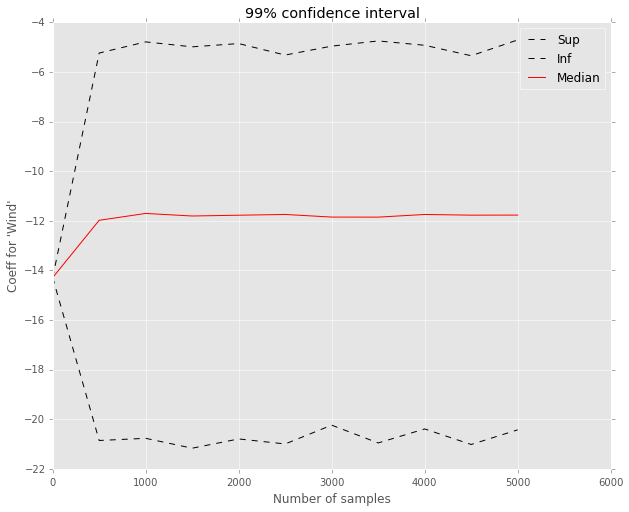

In [20]:
plt.figure(figsize=(10, 8))
plt.title('99% confidence interval')
plt.xlabel("Number of samples")
plt.ylabel("Coeff for 'Wind'")
plt.plot(B, inf, 'k--', label='Sup')
plt.plot(B, sup, 'k--', label="Inf")
plt.plot(B, wind_median, 'r', label="Median")
plt.legend(loc='best')

#### Q4

In [21]:
# finding the unique values of the column 'Month'
months = df['Month'].unique()
print(months)


[-1.50411651 -0.82542979 -0.14674307  0.53194364  1.21063036]


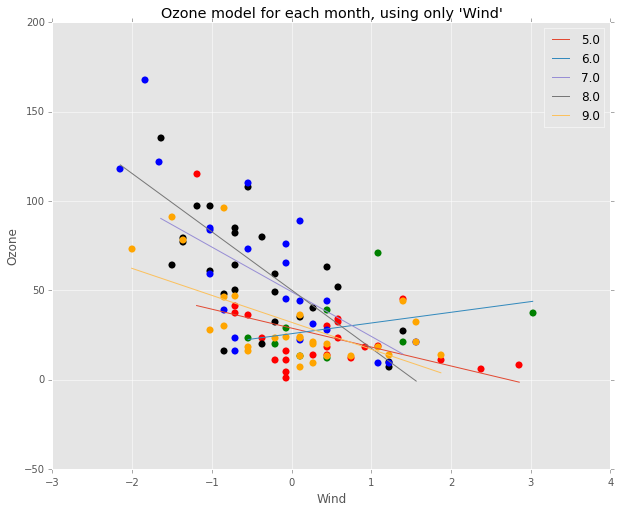

In [22]:
colors = ['r', 'g', 'k', 'b', 'orange']

plt.figure(figsize=(10, 8))
plt.title("Ozone model for each month, using only 'Wind'")
plt.xlabel('Wind')
plt.ylabel('Ozone')

i = 0
# for each unique value in the column 'Months'
for month in months:

    # selecting the line having Months = current_month
    df_wind = df[df['Month'] == month]

    # data frame with only the variables 'Ozone' and 'Wind'
    df_wind = df_wind[['Ozone', 'Wind']]

    # building the model on the data frame
    x, y, regr = build_linearModel(df_wind, 'Wind', 'Ozone')

    x = df_wind['Wind'].values
    x_sort = np.sort(x)

    # passing from dataFRame to numpy arrays to feed regr.predict()
    xin = []
    [xin.append([i]) for i in x_sort]
    xin = np.asarray(xin)

    # plotting the data
    plt.scatter(x, df_wind['Ozone'].values, c=colors[i], marker='o', lw=0, s=50)

    # denormalization of the values in 'Months'
    month_real = month * (norms['Month'][1])**0.5 + norms['Month'][0]

    # plotting the results of the model for the current month
    plt.plot(x_sort, regr.predict(xin), c=colors[i], label=str(month_real))

    i += 1

plt.legend(loc='best')



Il semble que le mois 6 (juin?) soit atypique: la concentration en ozone augmente avec la force du vent, alors qu'elle diminue pour les autres mois.

##   ----------------------------------------------------------------------------------------------------------------------
##  
### Exercice 3

#### Q1

In [23]:
def stpforward(df, y_col, features, M):
    """ The function do not take exactly the inputs described in the exercice,
        it takes a pandas dataFrame, and lists of columns as features and target values :

        inputs:
        -------------------------------------------
        df        : dataFrame
        y_col     : name the column y in df
        features  : name of the features columns df
        M         : number of selected variables in x

        outputs:
        ----------------------------------------------
        theta : vector of linear coefficients for the M most relevant features
        S     : column name of the M most relevant features
        regr  : object containing the model and useful methods

    """

    # initialization
    theta = np.zeros(len(features))
    r = df[y_col].values

    # list of the columns NOT already taken as features of the model
    x = features.copy()

    # list of the columns taken as features of the model
    S = []

    for i in range(M):

        # dictionnary {colname : dot product between the column and y}
        alphas = {colname: abs(np.inner(df[colname].values, r)) for colname in x}

        # determination of the column having the largest dot product with y
        colmax = max(alphas, key=alphas.get)

        # updatind x and S lists
        x.remove(colmax)
        S.append(colmax)

        # building the linear model with the columns in S as features
        xtemp, ytemp, regr = build_linearModel(df, S, y_col)

        # filling the output vector theta
        for k in range(len(regr.coef_[0])):
            j = features.index(S[k])
            theta[j] = regr.coef_[0][k]

        # computing the residues
        r = df[y_col].values - regr.predict(df[S].values)[0]

    return theta, S, regr



#### Q2

In [24]:
import numpy as np
from sklearn.linear_model.base import LinearModel, _pre_fit
from sklearn.base import RegressorMixin


class MYOMP(LinearModel, RegressorMixin):

    def __init__(self, n_nonzero_coefs=None, fit_intercept=True,
                 normalize=True, precompute='auto'):

        self.n_nonzero_coefs = n_nonzero_coefs
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.precompute = precompute

    def fit(self, df, y_col, features):
        """ With modifications to take pandas dataFrames as input.
        Fit the model using df[features,y] as training data.

        Parameters
        ----------
        df       : pandas dataFrame containing the data
        y_col    : column name of the target values
        features : column name of the features
        M        : number of variables to include in the model
        -------
        self : object
        returns an instance of self.

        """

        # passing from dataFrame to numpy arrays
        X = df[features_cols].values

        ytemp = df[y_col].values
        y_mod = []
        [y_mod.append([i]) for i in ytemp]
        y_mod = np.asarray(y_mod)

        # _pre_fit
        X, y, X_mean, y_mean, X_std, Gram, Xy = _pre_fit(
            X, y_mod, None, self.precompute, self.normalize, self.fit_intercept, copy=True)

        # contructing a dataFrame with the new X and y to feed stpforward()
        dataF = pd.DataFrame(np.column_stack((y, X)), index=range(
            1, len(X[:, 0]) + 1), columns=[y_col] + features)

        self.coef_, self.S_ , self.regr_ = stpforward(dataF, y_col, features_cols, self.n_nonzero_coefs)

        self._set_intercept(X_mean, y_mean, X_std)

        return self



#### Q3

In [25]:
#
# On reprend des données non centrées réduites, puisque _pre_fit, fait cette opération dans MYOMP
# On enlève juste les lignes contenant des Nan.

df = pd.read_csv('https://dl.dropboxusercontent.com/u/6044937/Data%20Sets/airquality.csv',
                 index_col=0, error_bad_lines=True)

df = df.dropna()


for i in range(3, 6):
    model = MYOMP(n_nonzero_coefs=i)
    model.fit(df, 'Ozone', features_cols)
    print('M=' + str(i) + ' : ', model.coef_)



M=3 :  [ 0.05982059 -3.33359131  1.65209291  0.          0.        ]
M=4 :  [ 0.04959683 -3.3165094   1.87087379 -2.99162786  0.        ]
M=5 :  [ 0.05027432 -3.31844386  1.89578642 -3.03995664  0.27387752]


#### Q4

In [26]:
# transforming the data from dataFrame to numpy arrays
X = df[features_cols].values  # this still the non-normalized dataFrame

ytemp = df['Ozone'].values
y_mod = []
[y_mod.append([i]) for i in ytemp]
y_mod = np.asarray(y_mod)

# applying OrthogonalMatchingPursuit
for i in range(3, 6):
    regr = linear_model.OrthogonalMatchingPursuit(n_nonzero_coefs=i)
    regr.fit(X, y_mod)
    print('M=' + str(i) + ' : ', regr.coef_)


M=3 :  [ 0.05982059 -3.33359131  1.65209291  0.          0.        ]
M=4 :  [ 0.04959683 -3.3165094   1.87087379 -2.99162786  0.        ]
M=5 :  [ 0.05027432 -3.31844386  1.89578642 -3.03995664  0.27387752]


On obtient les mêmes résultats avec OrthogonalMatchingPursuit ou MYOMP.

Par ailleurs, les résultats avec ces deux méthodes sont différents de ceux obtenus dans les exercices précédents car _pre_fit recentre aussi la colonne des valeurs cibles y, ce qui n'était pas demandé dans les autres exercices.

#### Q5 (bonus)

In [27]:
# defining the fraction to be taken as training data
training_fraction = 0.75

# randomly selecting the training rows
rows = sample(df.index.tolist(), int(len(df)*training_fraction))

# building the training data frame
df_training = df.ix[rows]

# building the validation data frame
df_validation = df.drop(rows)

# checking the samples
print(len(df_training))
print(df_training.head(10))
print()

print(len(df_validation))
print(df_validation.head(10))

83
     Ozone  Solar.R  Wind  Temp  Month  Day
125     78      197   5.1    92      9    2
82      16        7   6.9    74      7   21
50      12      120  11.5    73      6   19
105     28      273  11.5    82      8   13
71      85      175   7.4    89      7   10
128     47       95   7.4    87      9    5
94       9       24  13.8    81      8    2
152     18      131   8.0    76      9   29
101    110      207   8.0    90      8    9
64      32      236   9.2    81      7    3

28
    Ozone  Solar.R  Wind  Temp  Month  Day
8      19       99  13.8    59      5    8
13     11      290   9.2    66      5   13
19     30      322  11.5    68      5   19
21      1        8   9.7    59      5   21
23      4       25   9.7    61      5   23
24     32       92  12.0    61      5   24
28     23       13  12.0    67      5   28
30    115      223   5.7    79      5   30
48     37      284  20.7    72      6   17
67     40      314  10.9    83      7    6


In [28]:
# finding the rank of the matrix X
rgX = np.linalg.matrix_rank(df_validation[features_cols].values)
print("rank = " + str(rgX))
print()

print("       ",features_cols)

# dictionnary {m : risk}
risk = {}
for m in range(1,6):
    
    # training the model with df_training
    model = MYOMP(n_nonzero_coefs=m)
    model.fit(df_training, 'Ozone', features_cols)
    print('M=' + str(m) + ' : ', model.coef_)
    
    # prediction of the trained model on the df_validation data
    pred = model.predict(df_validation[features_cols].values)
    
    # computing the noise variance on the validation dataset
    y = df_validation['Ozone'].values
    varNoise = 1. / (len(pred) - rgX) * sum([( y[i] - pred[i])**2 for i in range(len(pred))])
    
    # computing the risk on the validation dataset
    risk[m] = varNoise * rgX
    
    
    
print()
print('{M : risque}')
print(risk)
    
    

rank = 5

        ['Solar.R', 'Wind', 'Temp', 'Month', 'Day']
M=1 :  [ 0.          0.          2.53586964  0.          0.        ]
M=2 :  [ 0.         -2.90392541  1.93194002  0.          0.        ]
M=3 :  [ 0.05839864 -2.87108726  1.80621378  0.          0.        ]
M=4 :  [ 0.05787967 -2.84456037  1.78760926  0.         -0.13654181]
M=5 :  [ 0.05061837 -2.85125104  1.90995961 -1.83033549 -0.10182331]

{M : risque}
{1: 6102.9393958640403, 2: 4996.1836731570738, 3: 4793.7189453388, 4: 5009.8297059778497, 5: 4724.9629187771652}


En créant une seule version aléatoire, des data frame training et validation, les résultats peuvent varier d'un tirage à l'autre concernant le meilleur M. Il faut donc essayer en créant plusieurs jeux aléatoires de ces data frame pour chercher des risques moyens, ce qui est fait dans la suite. 

In [55]:
def cross_validation(df, training_fraction, n_samples):
    """ using multiple random training and validation set """
    
    # dictionnary {m : risk}
    risk = {i : [] for i in range(1,6)}
    
    for n in range(n_samples):
        
        # randomly selecting the training rows
        rows = sample(df.index.tolist(), int(len(df)*training_fraction))

        # building the training data frame
        df_training = df.ix[rows]

        # building the validation data frame
        df_validation = df.drop(rows)
        
        # finding the rank of the matrix X
        rgX = np.linalg.matrix_rank(df_validation[features_cols].values)

        for m in range(1,6):
    
            # training the model with df_training
            model = MYOMP(n_nonzero_coefs=m)
            model.fit(df_training, 'Ozone', features_cols)
            print('M=' + str(m) + ' : ', model.coef_)

            # prediction of the trained model on the df_validation data
            pred = model.predict(df_validation[features_cols].values)

            # computing the noise variance on the validation dataset
            y = df_validation['Ozone'].values
            varNoise = 1. / (len(pred) - rgX) * sum([( y[i] - pred[i])**2 for i in range(len(pred))])

            # computing the risk on the validation dataset
            risk[m] = risk[m] + [varNoise * rgX]
            
    return risk


In [58]:
risk = cross_validation(df,0.75,200)



M=1 :  [ 0.          0.          2.47003941  0.          0.        ]
M=2 :  [ 0.         -4.372204    1.86758011  0.          0.        ]
M=3 :  [ 0.09004655 -4.46446429  1.67800447  0.          0.        ]
M=4 :  [ 0.07894911 -4.40841173  1.89791729 -3.16594097  0.        ]
M=5 :  [ 0.07856572 -4.34444957  1.92510032 -3.26793123  0.28758981]
M=1 :  [ 0.          0.          2.48196199  0.          0.        ]
M=2 :  [ 0.         -2.76662546  1.94721747  0.          0.        ]
M=3 :  [ 0.03832294 -2.80224805  1.8402562   0.          0.        ]
M=4 :  [ 0.0211553  -2.71587936  2.13188528 -3.73781532  0.        ]
M=5 :  [ 0.02098284 -2.71695093  2.12608361 -3.7238975  -0.05631726]
M=1 :  [ 0.          0.          2.51015344  0.          0.        ]
M=2 :  [ 0.         -3.77085054  1.83977668  0.          0.        ]
M=3 :  [ 0.06262852 -3.71717942  1.6605304   0.          0.        ]
M=4 :  [ 0.04848573 -3.83947932  1.86206802 -3.85209115  0.        ]
M=5 :  [ 0.04772543 -3.80717333  1

In [59]:
for key, value in risk.items():
    risk[key] = sum(risk[key])/float(len(risk[key]))
    
print(risk) 

{1: 3749.980381367865, 2: 3140.7576147465243, 3: 3017.305552896652, 4: 2983.8016731391372, 5: 2993.3128646102809}


En créant 200 data frame aléatoires de training et de validation, il semble que le meilleur modèle ayant le plus faible risque moyen est celui à 4 variables explicatives : Solar.R, Wind, Temp, et Month. Ce modèle ressort donc comme étant le meilleur.